In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
import pymc3 as pm

C:\Users\claud\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
swiss = pd.read_csv('swiss.csv') 
swiss.head() 

,Unnamed: 0,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [3]:
#Rename Infant Mortality 
swiss = swiss.rename(columns = {'Infant.Mortality': 'Infant_Mortality'}) 
#Explore the Data - missing value check 
swiss.isnull().any().sum()

0

In [4]:
#Min, Max, Mean, Std for continuous variables
#Remove categorical variable 'Unnamed:0'
swiss = swiss.drop('Unnamed: 0', axis = 1)
for i in swiss.columns:    
    print(i, ': Min-', min(swiss[i]), ', Max-', max(swiss[i]), ', Mean-', np.round(np.mean(swiss[i]),2),', Std-', np.round(np.std(swiss[i]),2))

Fertility : Min- 35.0 , Max- 92.5 , Mean- 70.14 , Std- 12.36
Agriculture : Min- 1.2 , Max- 89.7 , Mean- 50.66 , Std- 22.47
Examination : Min- 3 , Max- 37 , Mean- 16.49 , Std- 7.89
Education : Min- 1 , Max- 53 , Mean- 10.98 , Std- 9.51
Catholic : Min- 2.15 , Max- 100.0 , Mean- 41.14 , Std- 41.26
Infant_Mortality : Min- 10.8 , Max- 26.6 , Mean- 19.94 , Std- 2.88


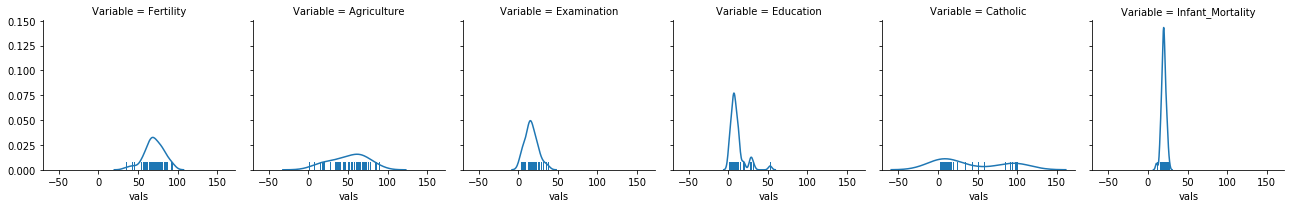

In [5]:
#Distribution of continuous variables 
df = swiss.melt(var_name='Variable', value_name='vals')
g = sns.FacetGrid(df, col='Variable') 
g = (g.map(sns.distplot, "vals", hist=False, rug=True))

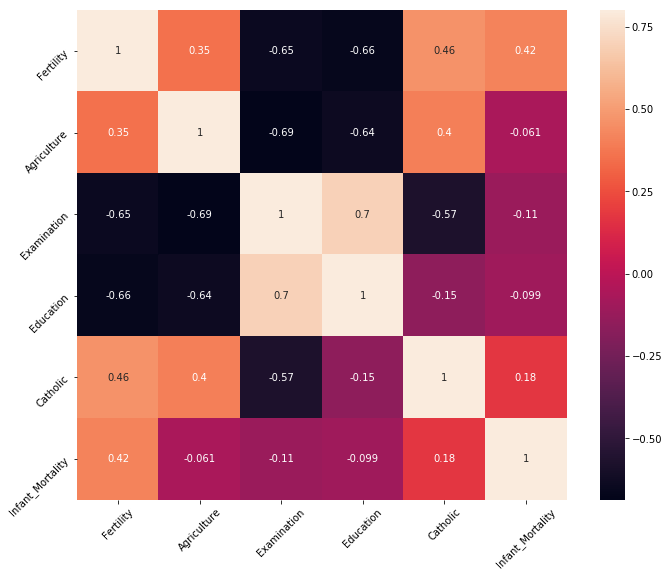

In [6]:
#Correlation Matrix 
corr_mat = swiss.corr() 
fig = plt.figure(figsize=(12,9)) 
sns.heatmap(corr_mat, vmax=0.8, square = True, annot = True) 
plt.xticks(rotation=45) 
plt.yticks(rotation=45) 
plt.show()

In [7]:
#Separate target variable from data 
swiss_target = swiss['Fertility'] 
swiss_data = swiss.drop('Fertility', axis=1) 
#Set target variable as y 
y = swiss_target

In [8]:
#Linear Model
#Split training set 
X1_train, X1_test, y1_train, y1_test = train_test_split(swiss_data, y, test_size = 0.4) 
X2_train, X2_test, y2_train, y2_test = train_test_split(swiss_data, y, test_size = 0.3) 
X3_train, X3_test, y3_train, y3_test = train_test_split(swiss_data, y, test_size = 0.2)

In [9]:
#Function to calculate error
def rmse(Y, Y_pred):    
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))    
    return rmse

In [10]:
lr_model = LinearRegression() 
lr_model.fit(X1_train, y1_train) 
coef1 = pd.DataFrame(lr_model.coef_, X1_train.columns, columns = ['Coefficient']) 
print('LR Model - Intercept: ', lr_model.intercept_.round(2)) 
print(coef1.round(2)) 
y1train_pred = lr_model.predict(X1_train) 
y1test_pred = lr_model.predict(X1_test) 
print('Training RMSE: ', rmse(y1_train, y1train_pred)) 
print('Testing RMSE: ', rmse(y1_test, y1test_pred))

LR Model - Intercept:  67.04
                  Coefficient
Agriculture             -0.10
Examination             -0.14
Education               -0.95
Catholic                 0.11
Infant_Mortality         0.78
Training RMSE:  7.14626369821886
Testing RMSE:  6.785597829467549


In [11]:
'''Interpreting the results for the linear regression model - Agriculture, Examination and Education have a negative impact on the Fertility Rate, whereas Catholic and Infant.Mortality have a positive impact. Infant Mortality could have a positive impact on fertility because if the parents lose a child within the first year they may want still want a child and try again, thereby increasing the rate of fertility. Education may negatively impact the fertility rate due to different priorities''' 

'Interpreting the results for the linear regression model - Agriculture, Examination and Education have a negative impact on the Fertility Rate, whereas Catholic and Infant.Mortality have a positive impact. Infant Mortality could have a positive impact on fertility because if the parents lose a child within the first year they may want still want a child and try again, thereby increasing the rate of fertility. Education may negatively impact the fertility rate due to different priorities'

In [12]:
lr_model2 = LinearRegression() 
lr_model2.fit(X2_train, y2_train) 
coef2 = pd.DataFrame(lr_model2.coef_, X2_train.columns, columns = ['Coefficient']) 
print('LR Model 2- Intercept: ', lr_model2.intercept_.round(2)) 
print(coef2.round(2)) 
y2train_pred = lr_model2.predict(X2_train) 
y2test_pred = lr_model2.predict(X2_test) 
print('Training RMSE: ', rmse(y2_train, y2train_pred)) 
print('Testing RMSE: ', rmse(y2_test, y2test_pred)) 

LR Model 2- Intercept:  66.57
                  Coefficient
Agriculture             -0.12
Examination             -0.21
Education               -0.80
Catholic                 0.09
Infant_Mortality         0.94
Training RMSE:  6.784183287223654
Testing RMSE:  6.81176774756709


In [13]:
lr_model3 = LinearRegression() 
lr_model3.fit(X3_train, y3_train) 
coef3 = pd.DataFrame(lr_model3.coef_, X3_train.columns, columns = ['Coefficient']) 
print('LR Model 3- Intercept: ', lr_model3.intercept_.round(2)) 
print(coef3.round(2)) 
y3train_pred = lr_model3.predict(X3_train) 
y3test_pred = lr_model3.predict(X3_test) 
print('Training RMSE: ', rmse(y3_train, y3train_pred)) 
print('Testing RMSE: ', rmse(y3_test, y3test_pred))

LR Model 3- Intercept:  66.61
                  Coefficient
Agriculture             -0.17
Examination             -0.35
Education               -0.82
Catholic                 0.09
Infant_Mortality         1.16
Training RMSE:  6.445621868165619
Testing RMSE:  7.641842316069078


In [14]:
'''For all three models there is a negative coefficient for Agriculture, Examination, and Education meaning that a unit increase in these three variables leads to a decrease in the Fertility Rate. The training errors for all three vary slightly with model 2 having the lowest. Model 2 has a testing error that is higher than the training error, this could be an indication of overfitting. Model 1 & 3 have testing errors that are less than training errors, overfitting is less of a concern in these cases'''

'For all three models there is a negative coefficient for Agriculture, Examination, and Education meaning that a unit increase in these three variables leads to a decrease in the Fertility Rate. The training errors for all three vary slightly with model 2 having the lowest. Model 2 has a testing error that is higher than the training error, this could be an indication of overfitting. Model 1 & 3 have testing errors that are less than training errors, overfitting is less of a concern in these cases'

In [15]:
#Bayesian Linear Model
#Split data set
X1_train_y = pd.concat([X1_train, y1_train], axis=1) 
X1_test_y = pd.concat([X1_test, y1_test], axis=1) 
X2_train_y = pd.concat([X2_train, y2_train], axis=1) 
X2_test_y = pd.concat([X2_test, y2_test], axis=1) 
X3_train_y = pd.concat([X3_train, y3_train], axis=1) 
X3_test_y = pd.concat([X3_test, y3_test], axis=1)

In [16]:
formula = 'Fertility ~ Agriculture + Examination + Education + Catholic + Infant_Mortality' 
with pm.Model() as linear_model:    
    family = pm.glm.families.Normal()    
    pm.GLM.from_formula(formula, data = X1_train_y, family = family)    
    trace = pm.sample(2000, chains = 2, tune = 500) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, Infant_Mortality, Catholic, Education, Examination, Agriculture, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:44<00:00, 112.84draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


In [17]:
pm.summary(trace).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,66.97,21.82,0.57,24.72,110.78,1532.75,1.0
Agriculture,-0.09,0.15,0.00,-0.38,0.21,1685.04,1.0
Examination,-0.12,0.43,0.01,-1.01,0.69,1838.85,1.0
Education,-0.95,0.34,0.01,-1.59,-0.28,1538.12,1.0
Catholic,0.12,0.05,0.00,0.01,0.22,1825.85,1.0
Infant_Mortality,0.76,0.75,0.02,-0.73,2.26,1631.75,1.0
sd,8.37,1.30,0.03,6.11,10.99,1697.63,1.0


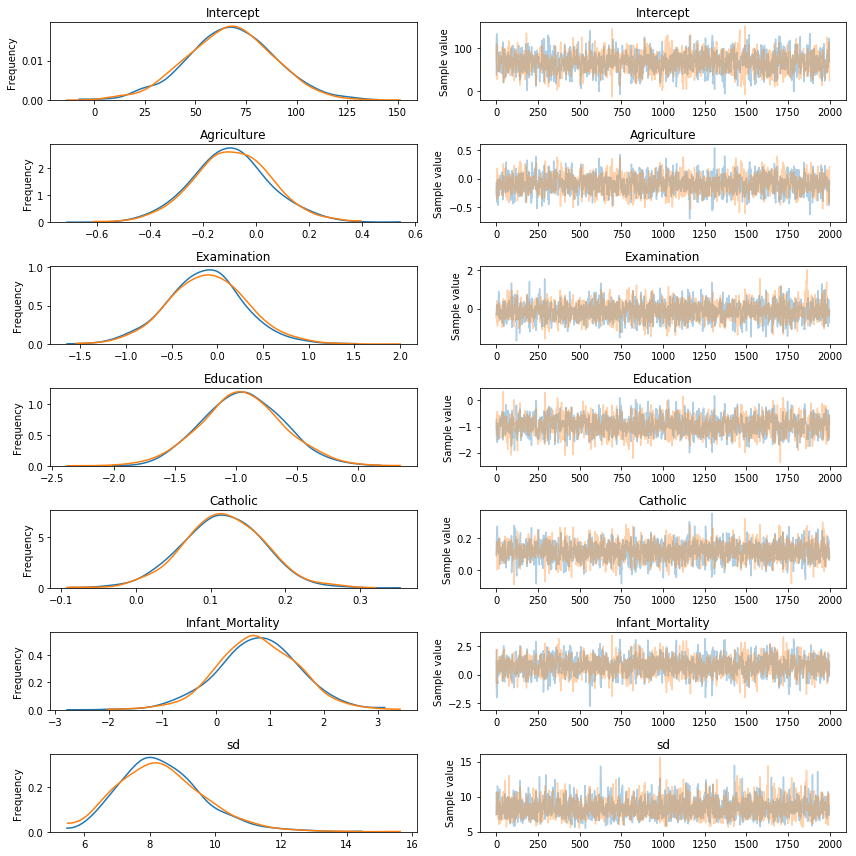

In [18]:
#Posterior distribution 
pm.traceplot(trace, figsize = (12, 12));

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CD646CE80>,
      dtype=object)

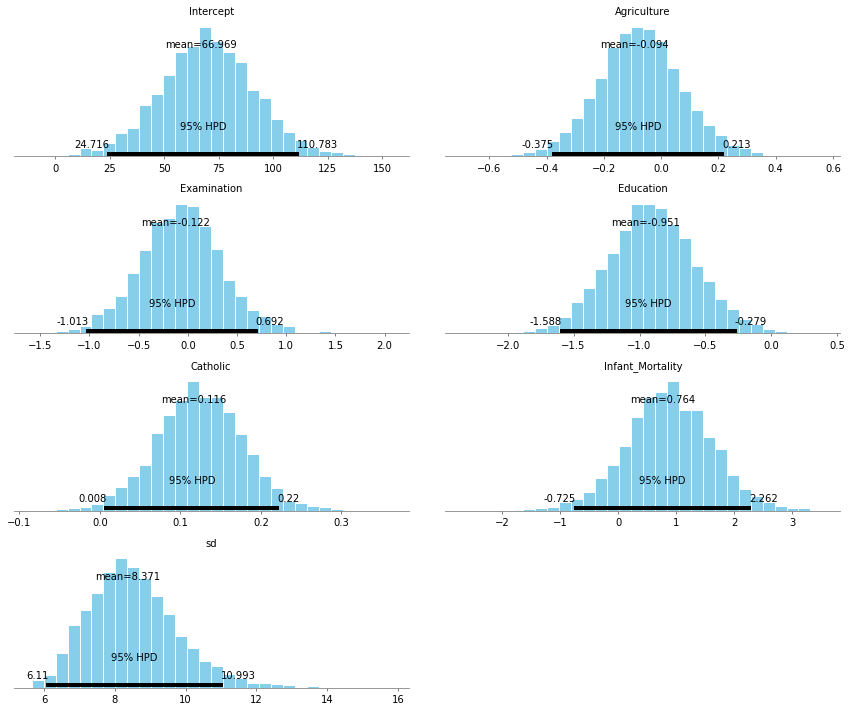

In [19]:
#Posterior distribution - histogram 
pm.plot_posterior(trace)

In [20]:
#Function to make predictions 
def test_model(trace, test_obs):        
    var_dict = {}    
    for variable in trace.varnames:        
        var_dict[variable] = trace[variable]        
    
    #initialize y_pred variable    
    y_pred = 0        
    
    #Results into a dataframe    
    var_weights = pd.DataFrame(var_dict)        
    
    #Standard deviation of the likelihood    
    sd_value = var_weights['sd'].mean() 
   
    #Actual Value    
    actual = test_obs['Fertility']        
    
    #Add in intercept term    
    test_obs['Intercept'] = 1    
    test_obs = test_obs.drop('Fertility')        
    
    #Align weights and test observation    
    var_weights = var_weights[test_obs.index] 
    
    #Means for all the weights    
    var_means = var_weights.mean(axis=0) 

    #Location of mean for observation    
    mean_loc = np.dot(var_means, test_obs)        
    
    #Estimates of grade    
    estimates = np.random.normal(loc = mean_loc, scale = sd_value, size = 1000) 
   
    #Plot all the estimates    
    plt.figure()    
    
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                 kde_kws = {'linewidth' : 4},                
                 label = 'Estimated Dist.')    
    
    #Plot the actual grade    
    plt.vlines(x = actual, ymin = 0, ymax = 5,                
               linestyles = '--', colors = 'red',               
               label = 'True Fertility',              
               linewidth = 2.5)        
    
    #Plot the mean estimate    
    plt.vlines(x = mean_loc, ymin = 0, ymax = 5,                
               linestyles = '-', colors = 'orange',               
               label = 'Mean Estimate',              
               linewidth = 2.5)       
    
    plt.legend(loc = 1)    
    plt.title('Density Plot');
    plt.xlabel('Fertility'); plt.ylabel('Density');        
    
    y_pred = mean_loc    
    
    #Prediction information    
    print('True Grade = %d' % actual)    
    print('Average Estimate = %0.4f' % mean_loc)   
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5), np.percentile(estimates, 95)))    
    
    return y_pred 

C:\Users\claud\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\claud\Anaconda3\lib\site-packages\pandas\core\series.py:914: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 77
Average Estimate = 70.8002
5% Estimate = 57.3476    95% Estimate = 84.4175


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 64.8396
5% Estimate = 52.0567    95% Estimate = 78.1557


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 68
Average Estimate = 75.0569
5% Estimate = 62.1936    95% Estimate = 89.0323


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 42
Average Estimate = 55.6118
5% Estimate = 42.1782    95% Estimate = 68.8091


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 58
Average Estimate = 61.4333
5% Estimate = 47.5518    95% Estimate = 75.2927


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 61
Average Estimate = 67.6318
5% Estimate = 53.7180    95% Estimate = 80.7754


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 79
Average Estimate = 72.1654
5% Estimate = 58.5669    95% Estimate = 86.4032


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 74.8652
5% Estimate = 61.0438    95% Estimate = 89.3890


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 74
Average Estimate = 70.9782
5% Estimate = 56.9667    95% Estimate = 84.3521


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 66
Average Estimate = 67.1146
5% Estimate = 52.9671    95% Estimate = 81.6514


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 83
Average Estimate = 80.5786
5% Estimate = 65.8352    95% Estimate = 93.8519


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 68
Average Estimate = 65.3863
5% Estimate = 52.1844    95% Estimate = 80.5232


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 56
Average Estimate = 62.6037
5% Estimate = 49.0065    95% Estimate = 76.2681


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 35
Average Estimate = 30.5873
5% Estimate = 17.0104    95% Estimate = 43.7855


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 76
Average Estimate = 62.8718
5% Estimate = 48.5817    95% Estimate = 76.1614


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 70
Average Estimate = 78.7697
5% Estimate = 66.4051    95% Estimate = 91.5641


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 71
Average Estimate = 69.7489
5% Estimate = 56.1337    95% Estimate = 83.3686


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 82
Average Estimate = 77.6570
5% Estimate = 64.2254    95% Estimate = 91.6170


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 70
Average Estimate = 64.9321
5% Estimate = 51.1321    95% Estimate = 78.4983


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 92
Average Estimate = 79.8111
5% Estimate = 65.5303    95% Estimate = 93.8973


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 76
Average Estimate = 86.7334
5% Estimate = 72.6976    95% Estimate = 99.6308


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 60
Average Estimate = 63.1409
5% Estimate = 49.7908    95% Estimate = 76.7652


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 92
Average Estimate = 81.5897
5% Estimate = 68.7817    95% Estimate = 94.9544


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 82
Average Estimate = 81.2273
5% Estimate = 67.3484    95% Estimate = 94.9370


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 69
Average Estimate = 79.1393
5% Estimate = 65.7008    95% Estimate = 92.3021


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 64
Average Estimate = 60.7618
5% Estimate = 46.7757    95% Estimate = 74.7277


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 44
Average Estimate = 52.8112
5% Estimate = 38.9978    95% Estimate = 66.4086


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 72
Average Estimate = 71.4644
5% Estimate = 58.7486    95% Estimate = 84.6820


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 64
Average Estimate = 50.1346
5% Estimate = 36.6414    95% Estimate = 63.3391


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 79
Average Estimate = 84.0065
5% Estimate = 70.0813    95% Estimate = 97.5604


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 87
Average Estimate = 83.6653
5% Estimate = 69.9639    95% Estimate = 97.6258


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 72
Average Estimate = 66.0868
5% Estimate = 52.1345    95% Estimate = 80.4641


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 70.7720
5% Estimate = 57.3160    95% Estimate = 83.9097


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 75.2870
5% Estimate = 62.0453    95% Estimate = 89.7346


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 54
Average Estimate = 51.2324
5% Estimate = 37.6300    95% Estimate = 64.4508


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 55
Average Estimate = 52.1712
5% Estimate = 38.5074    95% Estimate = 67.9586


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 83
Average Estimate = 80.2509
5% Estimate = 66.6847    95% Estimate = 93.4793


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 92
Average Estimate = 84.1527
5% Estimate = 71.0406    95% Estimate = 98.2136


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 63.5122
5% Estimate = 49.3732    95% Estimate = 77.5269


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 72
Average Estimate = 74.1852
5% Estimate = 60.4021    95% Estimate = 87.1729


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 80
Average Estimate = 70.2365
5% Estimate = 55.4231    95% Estimate = 83.0158


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 85
Average Estimate = 74.8446
5% Estimate = 61.2714    95% Estimate = 88.5789


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 75
Average Estimate = 79.7533
5% Estimate = 65.1889    95% Estimate = 93.5359


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 77
Average Estimate = 81.6299
5% Estimate = 68.2200    95% Estimate = 94.7655


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 69.5015
5% Estimate = 55.5555    95% Estimate = 83.3317


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 67
Average Estimate = 71.4012
5% Estimate = 57.2634    95% Estimate = 85.1976


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 57
Average Estimate = 65.9152
5% Estimate = 51.2669    95% Estimate = 79.8853


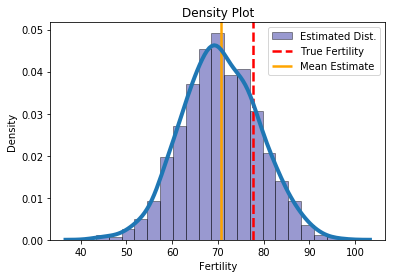

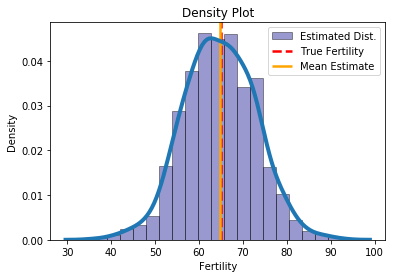

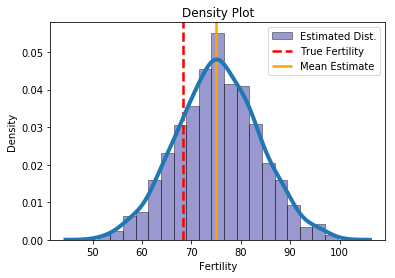

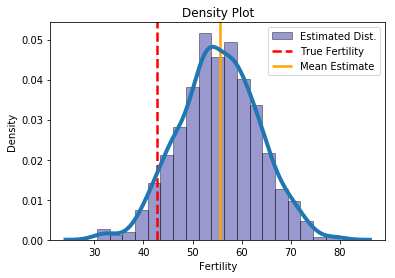

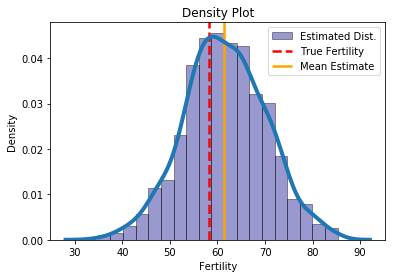

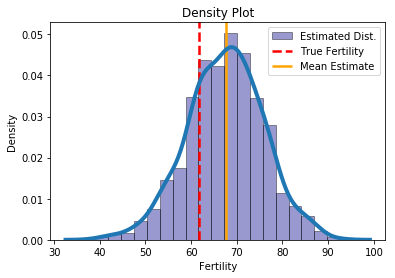

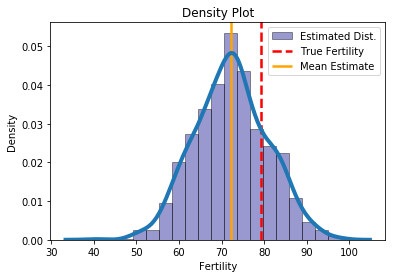

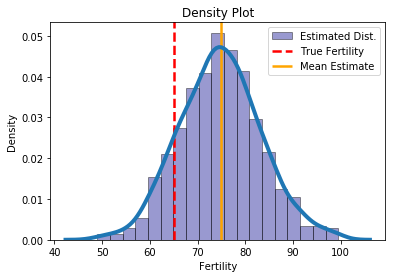

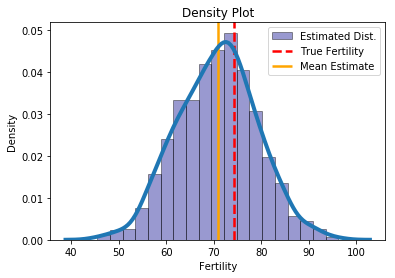

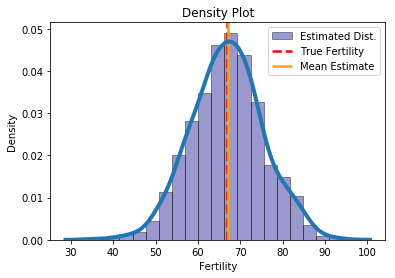

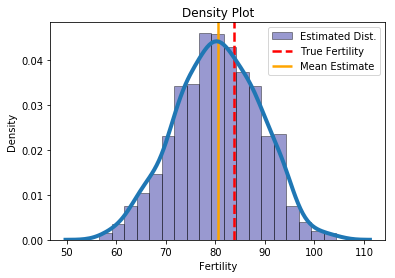

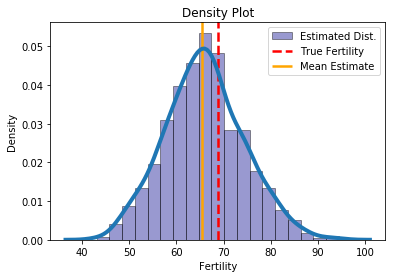

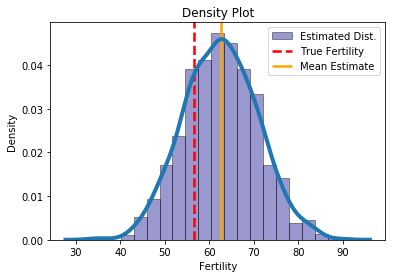

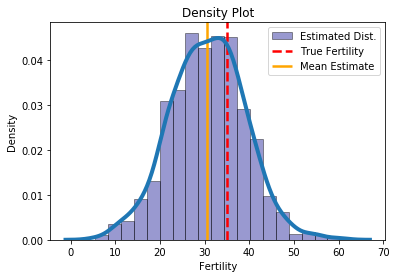

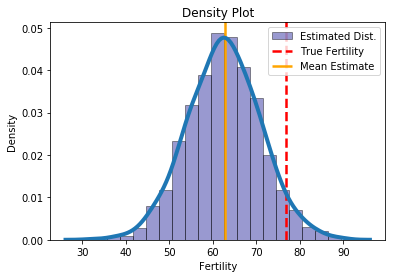

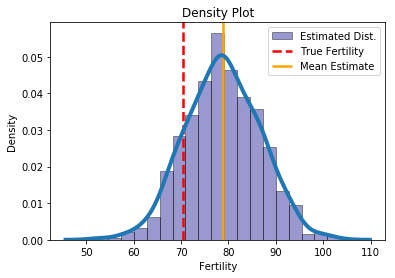

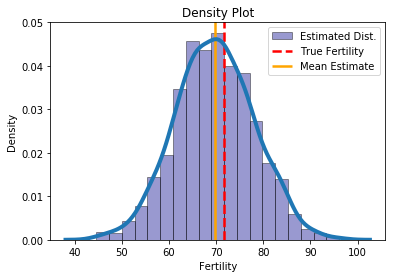

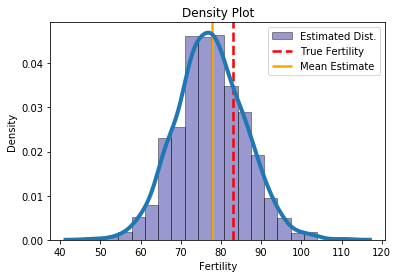

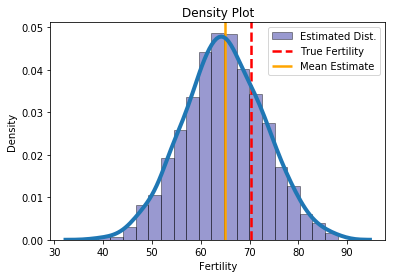

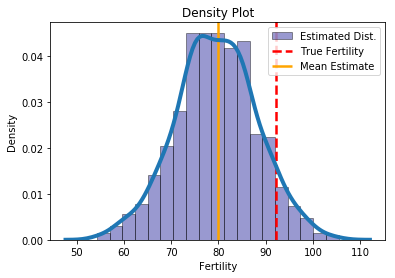

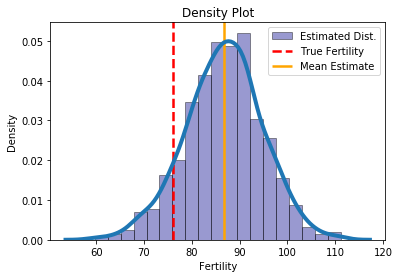

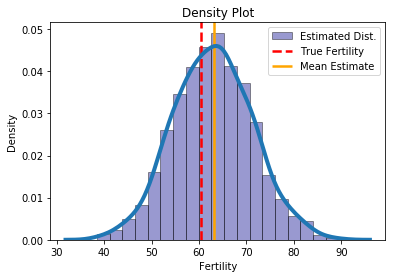

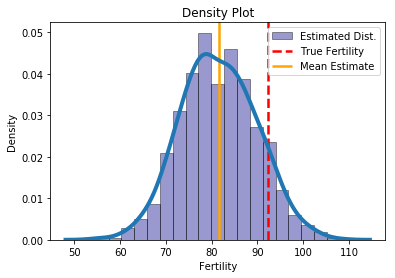

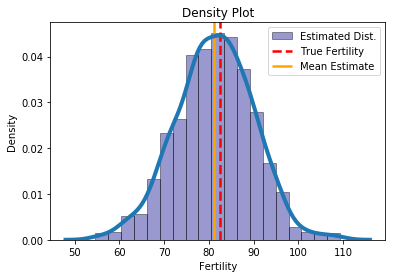

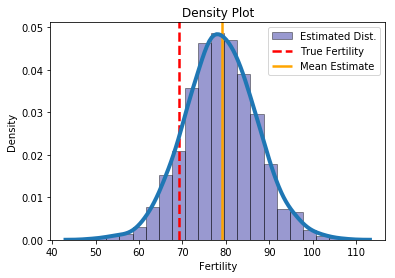

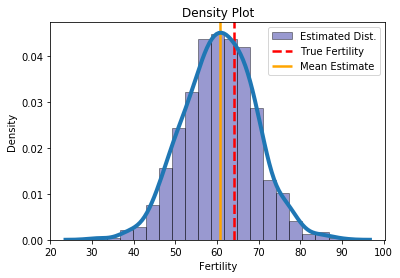

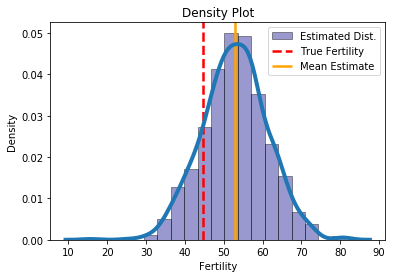

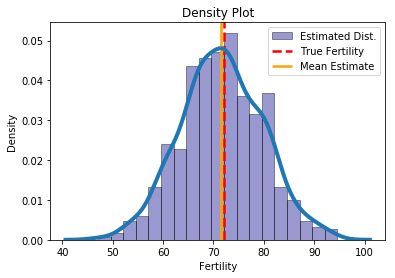

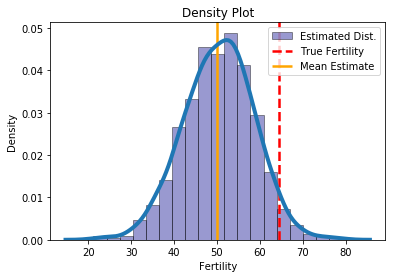

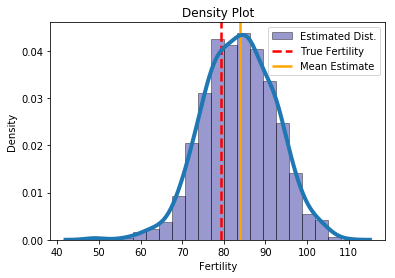

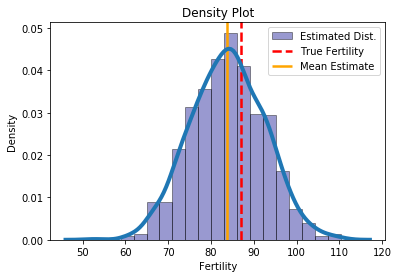

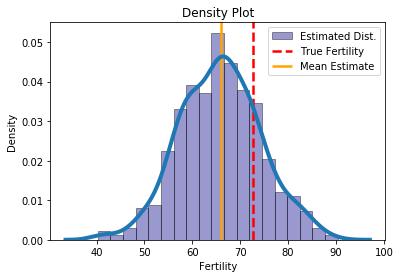

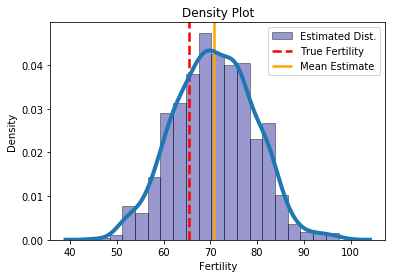

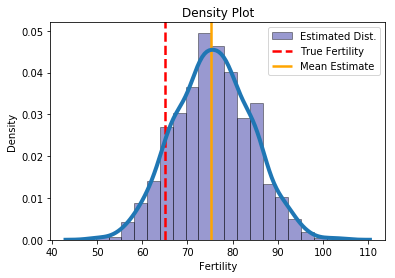

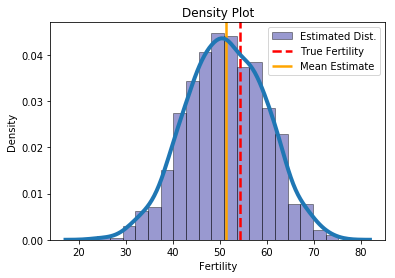

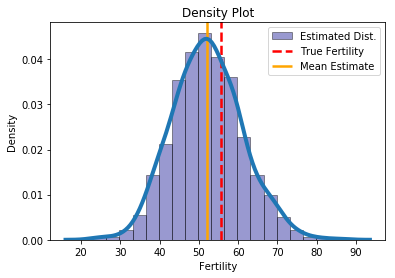

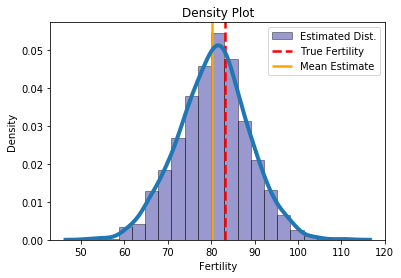

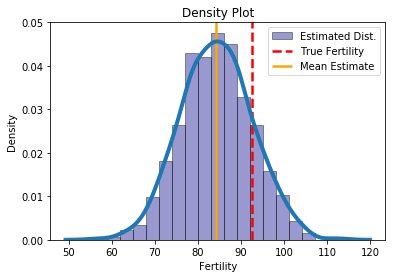

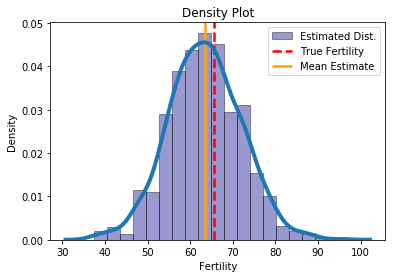

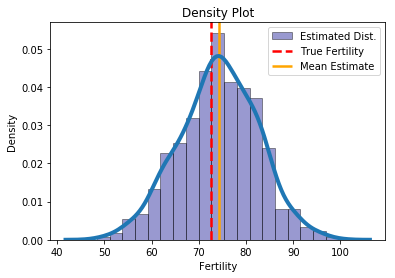

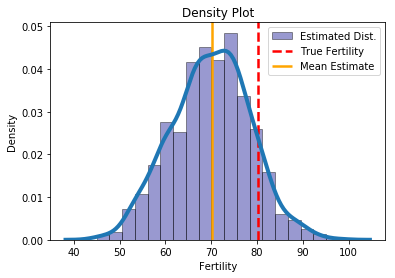

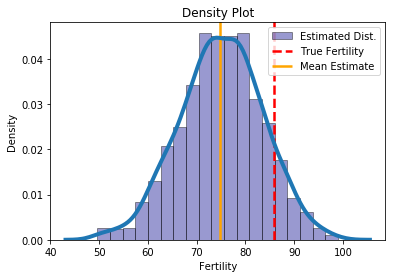

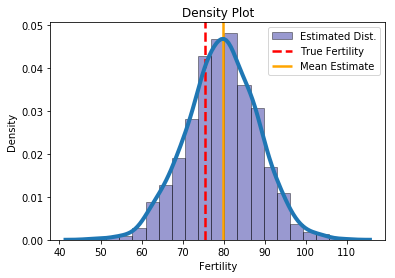

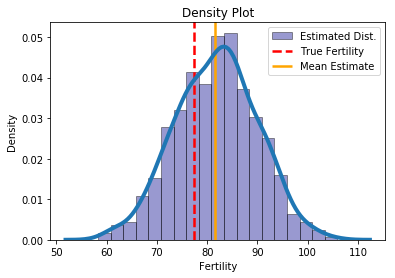

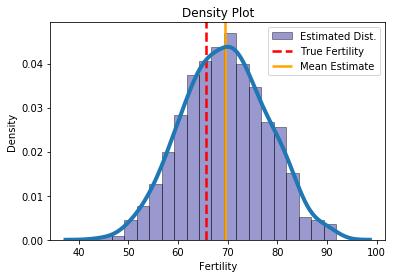

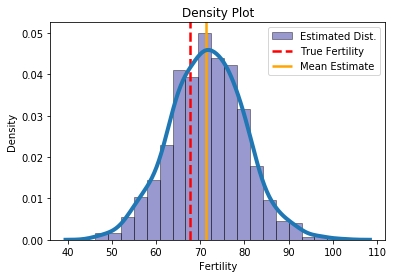

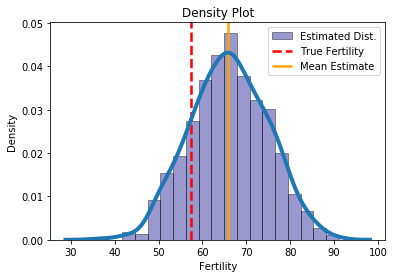

In [21]:
# BLR Model 1 training and test predictions 
b_y1train_pred = [] 
for i in range(len(X1_train_y)):    
    temp = test_model(trace, X1_train_y.iloc[i])     
    b_y1train_pred.append(temp) 

b_y1test_pred = [] 
for i in range(len(X1_test_y)):    
    temp = test_model(trace, X1_test_y.iloc[i])     
    b_y1test_pred.append(temp) 

In [22]:
#BLR Model 2 with 70:30 split 
with pm.Model() as linear_model:    
    family = pm.glm.families.Normal()    
    pm.GLM.from_formula(formula, data = X2_train_y, family = family)    
    trace2 = pm.sample(2000, chains = 2, tune = 500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, Infant_Mortality, Catholic, Education, Examination, Agriculture, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:34<00:00, 143.09draws/s]
The acceptance probability does not match the target. It is 0.8869144839249322, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8947411909506129, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\claud\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\claud\Anaconda3\lib\site-packages\pandas\core\series.py:914: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 68
Average Estimate = 74.3698
5% Estimate = 61.8822    95% Estimate = 87.6344


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 70
Average Estimate = 66.4087
5% Estimate = 53.7288    95% Estimate = 78.7950


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 77
Average Estimate = 72.4697
5% Estimate = 60.4981    95% Estimate = 86.1343


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 71
Average Estimate = 71.5511
5% Estimate = 58.7964    95% Estimate = 83.8624


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 87
Average Estimate = 83.2571
5% Estimate = 71.8480    95% Estimate = 96.0047


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 82
Average Estimate = 80.9199
5% Estimate = 68.1000    95% Estimate = 92.8004


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 63.9082
5% Estimate = 51.8513    95% Estimate = 77.1689


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 69
Average Estimate = 77.7786
5% Estimate = 64.4783    95% Estimate = 89.3280


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 72
Average Estimate = 72.1261
5% Estimate = 59.3205    95% Estimate = 84.3984


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 75.8702
5% Estimate = 62.9097    95% Estimate = 88.5335


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 60
Average Estimate = 63.6625
5% Estimate = 51.9339    95% Estimate = 75.6711


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 42
Average Estimate = 59.0316
5% Estimate = 46.6367    95% Estimate = 71.9480


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 55
Average Estimate = 56.4808
5% Estimate = 43.5729    95% Estimate = 69.7713


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 76
Average Estimate = 65.4377
5% Estimate = 53.3572    95% Estimate = 78.0070


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 72
Average Estimate = 74.3144
5% Estimate = 61.6985    95% Estimate = 87.0393


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 67
Average Estimate = 72.7053
5% Estimate = 60.0511    95% Estimate = 85.4230


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 79
Average Estimate = 82.9921
5% Estimate = 70.9290    95% Estimate = 94.5929


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 92
Average Estimate = 77.7510
5% Estimate = 64.4242    95% Estimate = 91.3056


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 35
Average Estimate = 37.2311
5% Estimate = 24.4365    95% Estimate = 50.0552


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 61
Average Estimate = 67.1462
5% Estimate = 54.9529    95% Estimate = 79.8223


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 80
Average Estimate = 73.6258
5% Estimate = 60.7795    95% Estimate = 86.3292


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 74
Average Estimate = 72.8418
5% Estimate = 59.9526    95% Estimate = 84.5307


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 72
Average Estimate = 68.4310
5% Estimate = 56.4850    95% Estimate = 80.6068


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 77
Average Estimate = 79.4212
5% Estimate = 66.2591    95% Estimate = 92.2930


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 54
Average Estimate = 52.6400
5% Estimate = 40.0212    95% Estimate = 65.3342


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 82
Average Estimate = 78.8873
5% Estimate = 66.8031    95% Estimate = 91.6269


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 76
Average Estimate = 88.4258
5% Estimate = 75.4135    95% Estimate = 101.2694


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 58
Average Estimate = 64.2581
5% Estimate = 51.6165    95% Estimate = 77.1920


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 83
Average Estimate = 81.4952
5% Estimate = 69.8907    95% Estimate = 94.3152


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 68
Average Estimate = 67.1419
5% Estimate = 54.2553    95% Estimate = 79.4965


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 64
Average Estimate = 54.7206
5% Estimate = 42.5728    95% Estimate = 68.0445


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 92
Average Estimate = 81.4599
5% Estimate = 68.3568    95% Estimate = 94.4469


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 74.1616
5% Estimate = 60.6689    95% Estimate = 86.6120


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 64
Average Estimate = 61.1283
5% Estimate = 47.9557    95% Estimate = 74.3442


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 79
Average Estimate = 71.8188
5% Estimate = 58.3532    95% Estimate = 84.4909


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 57
Average Estimate = 65.6380
5% Estimate = 53.1055    95% Estimate = 77.7025


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 83
Average Estimate = 79.9092
5% Estimate = 67.5966    95% Estimate = 92.6696


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 44
Average Estimate = 56.0601
5% Estimate = 43.6287    95% Estimate = 69.7038


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 75
Average Estimate = 77.2865
5% Estimate = 64.5181    95% Estimate = 90.3586


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 71.4974
5% Estimate = 59.1726    95% Estimate = 83.9525


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 72.5981
5% Estimate = 59.3645    95% Estimate = 86.0405


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 56
Average Estimate = 63.1664
5% Estimate = 49.5627    95% Estimate = 75.5614


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 65.2939
5% Estimate = 53.1887    95% Estimate = 77.8519


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 92
Average Estimate = 84.5585
5% Estimate = 70.9594    95% Estimate = 97.1096


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 66
Average Estimate = 67.7429
5% Estimate = 54.6702    95% Estimate = 79.5557


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 70
Average Estimate = 77.1575
5% Estimate = 64.4657    95% Estimate = 89.7321


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 85
Average Estimate = 76.2780
5% Estimate = 64.4594    95% Estimate = 89.1625


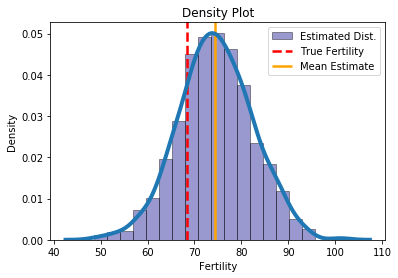

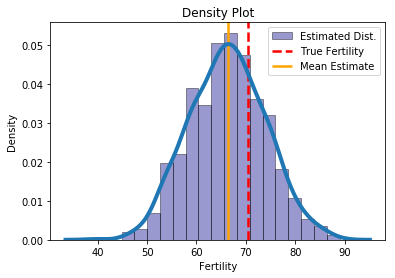

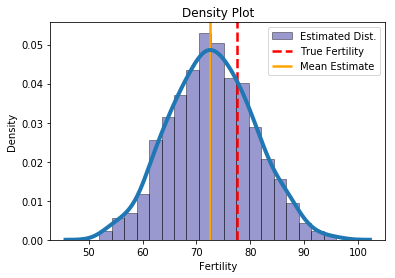

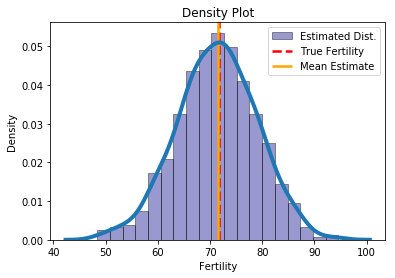

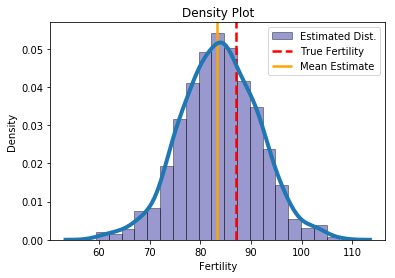

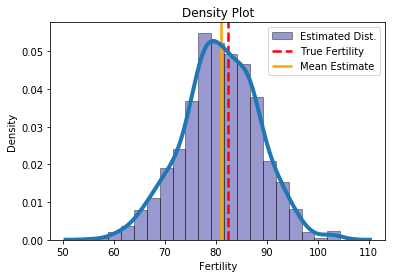

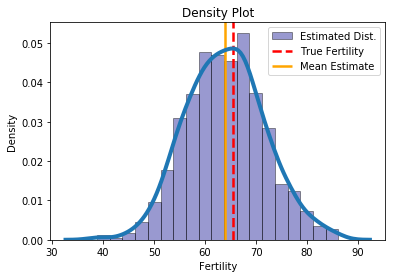

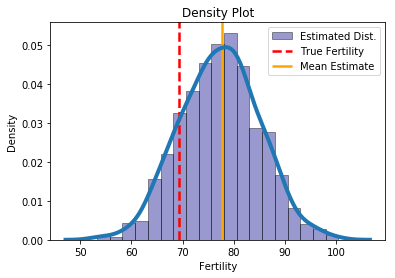

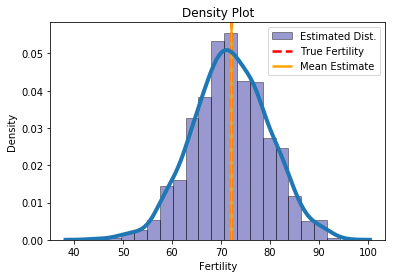

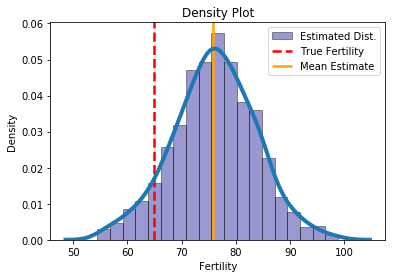

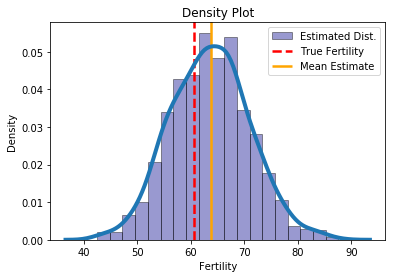

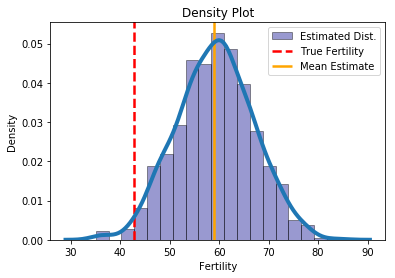

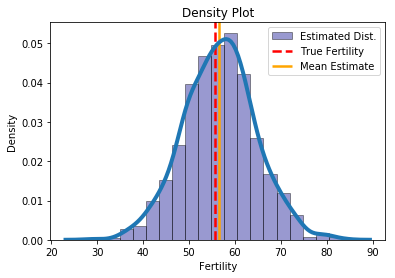

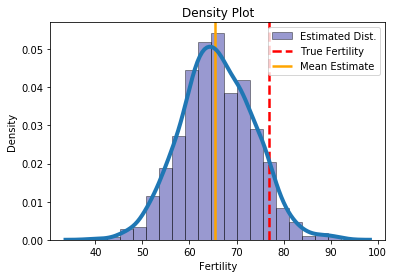

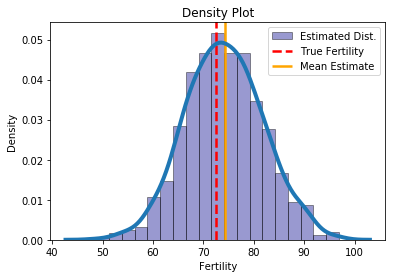

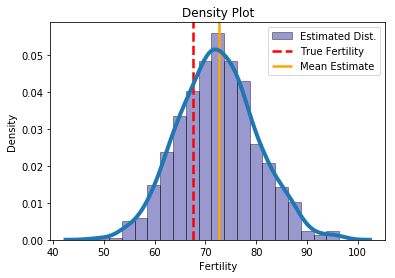

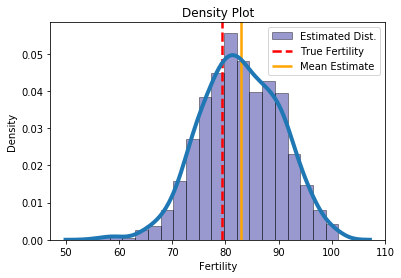

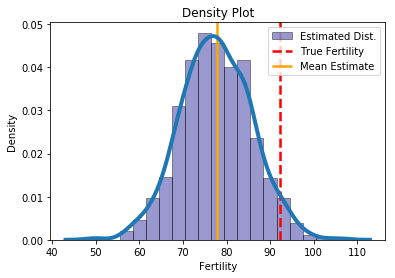

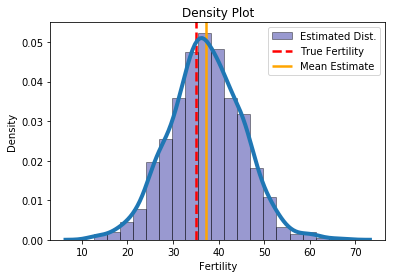

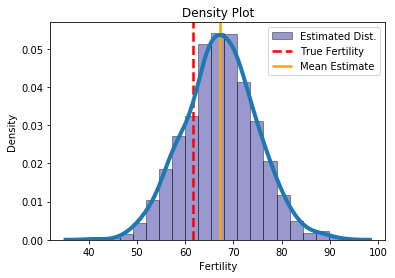

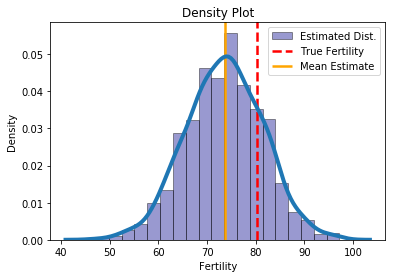

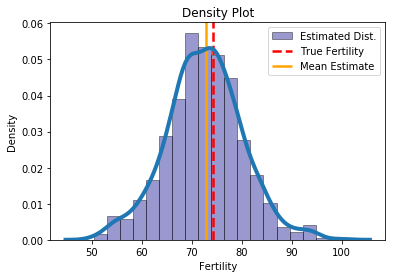

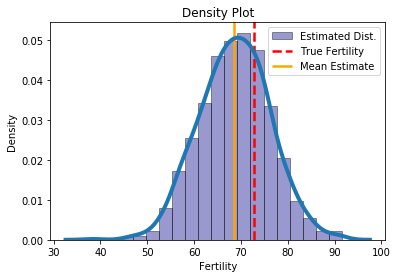

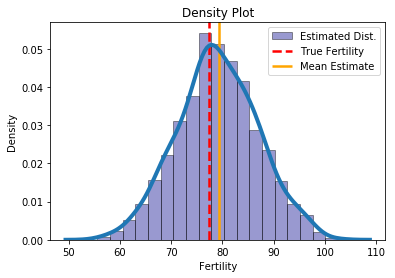

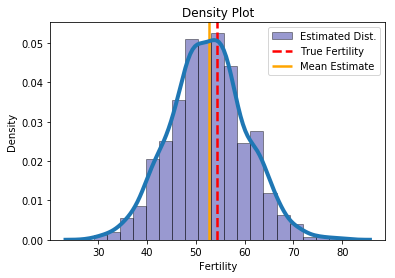

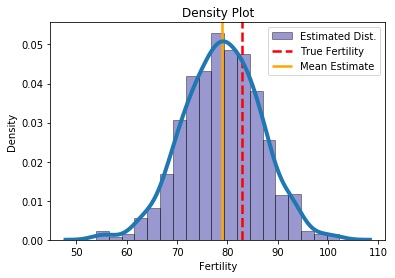

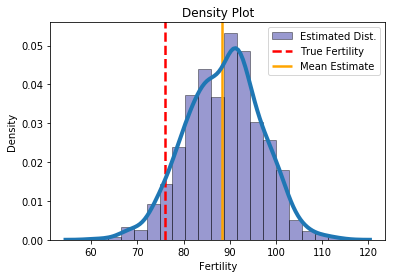

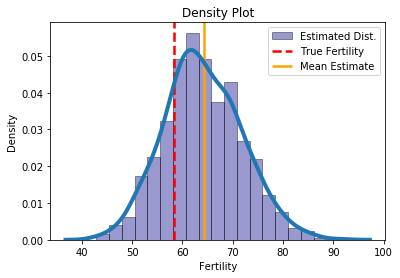

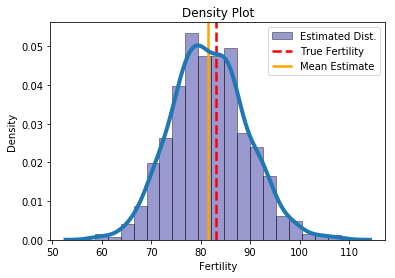

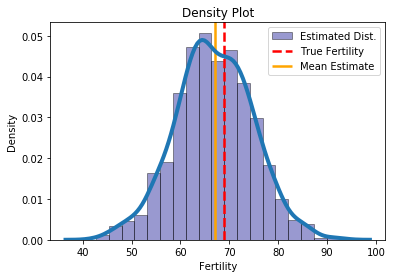

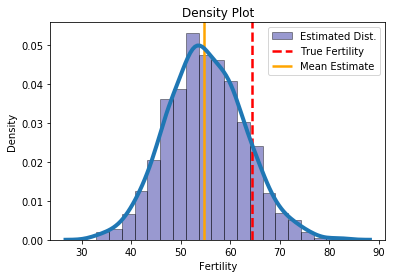

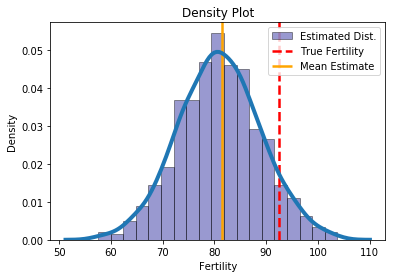

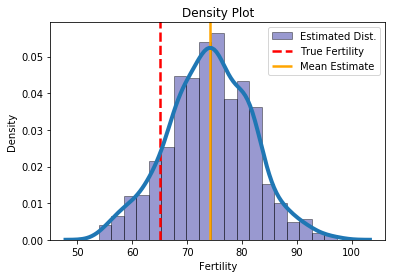

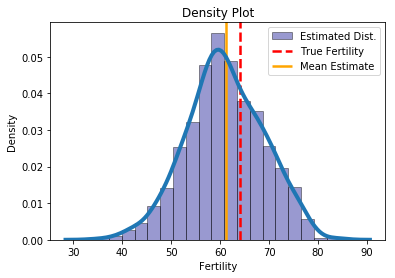

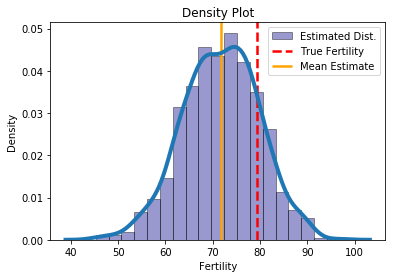

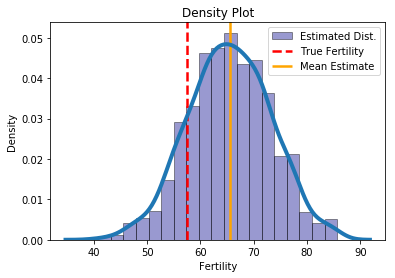

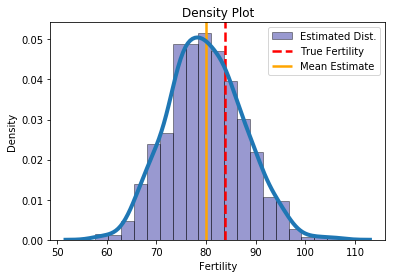

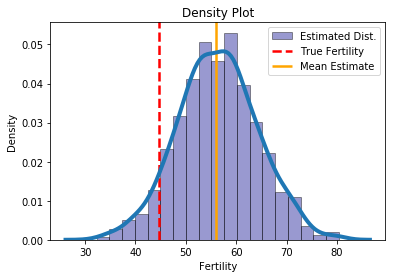

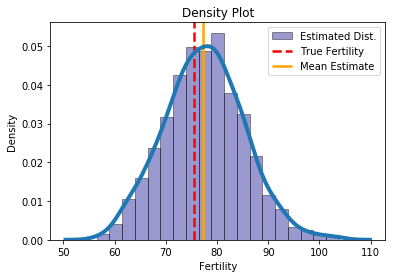

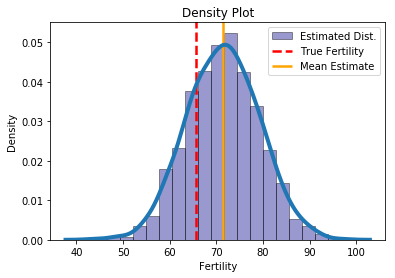

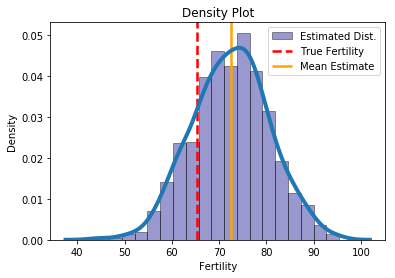

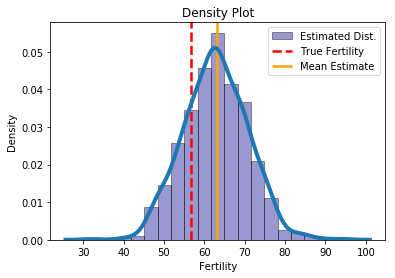

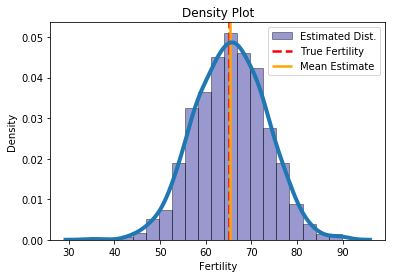

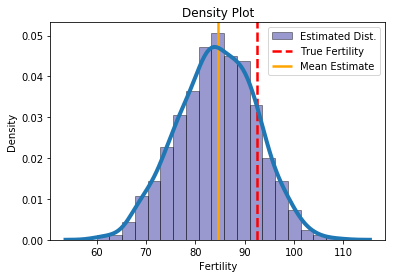

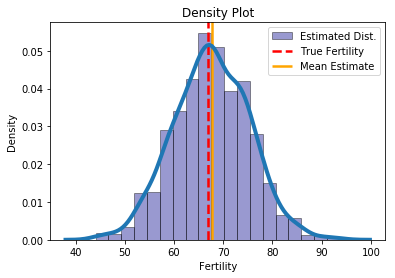

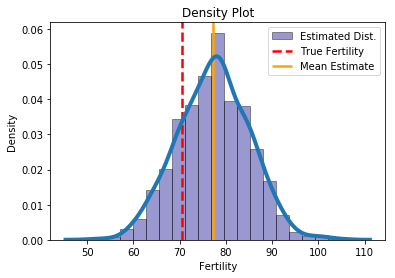

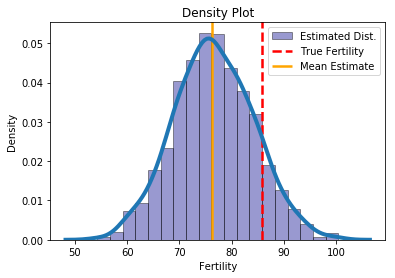

In [23]:
# BLR Model 2 training and test predictions 
b_y2train_pred = [] 
for i in range(len(X2_train_y)):    
    temp = test_model(trace2, X2_train_y.iloc[i])     
    b_y2train_pred.append(temp) 
    
b_y2test_pred = [] 
for i in range(len(X2_test_y)):    
    temp = test_model(trace2, X2_test_y.iloc[i])     
    b_y2test_pred.append(temp) 

In [24]:
#BLR Model 3 with 80:20 split 
with pm.Model() as linear_model:    
    family = pm.glm.families.Normal()    
    pm.GLM.from_formula(formula, data = X3_train_y, family = family)    
    trace3 = pm.sample(2000, chains = 2, tune = 500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, Infant_Mortality, Catholic, Education, Examination, Agriculture, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:35<00:00, 138.97draws/s]


C:\Users\claud\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\claud\Anaconda3\lib\site-packages\pandas\core\series.py:914: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 68
Average Estimate = 72.9697
5% Estimate = 60.3221    95% Estimate = 85.3817


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 66
Average Estimate = 66.8679
5% Estimate = 55.0739    95% Estimate = 78.8586


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 61.8435
5% Estimate = 50.0557    95% Estimate = 73.8710


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 54
Average Estimate = 49.5009
5% Estimate = 36.8827    95% Estimate = 62.1174


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 70
Average Estimate = 65.1715
5% Estimate = 52.9336    95% Estimate = 76.6876


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 72
Average Estimate = 68.4006
5% Estimate = 55.8465    95% Estimate = 80.7201


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 69
Average Estimate = 76.4519
5% Estimate = 65.0164    95% Estimate = 89.3813


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 74
Average Estimate = 73.3935
5% Estimate = 61.1105    95% Estimate = 85.0452


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 76.3060
5% Estimate = 64.1885    95% Estimate = 88.4671


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 71
Average Estimate = 71.8903
5% Estimate = 60.1522    95% Estimate = 82.7829


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 70
Average Estimate = 75.2804
5% Estimate = 64.3764    95% Estimate = 87.9015


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 68
Average Estimate = 66.5290
5% Estimate = 54.5788    95% Estimate = 78.7160


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 72
Average Estimate = 72.4536
5% Estimate = 60.7676    95% Estimate = 84.5529


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 79
Average Estimate = 70.1156
5% Estimate = 58.8298    95% Estimate = 81.9559


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 87
Average Estimate = 82.8229
5% Estimate = 72.0994    95% Estimate = 94.8456


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 77
Average Estimate = 77.8944
5% Estimate = 65.2371    95% Estimate = 89.9148


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 57
Average Estimate = 63.5874
5% Estimate = 51.3321    95% Estimate = 76.4805


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 75
Average Estimate = 75.5266
5% Estimate = 63.6812    95% Estimate = 87.0141


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 42
Average Estimate = 57.9800
5% Estimate = 46.2660    95% Estimate = 69.9737


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 55
Average Estimate = 55.8318
5% Estimate = 44.0866    95% Estimate = 68.5113


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 76
Average Estimate = 90.5940
5% Estimate = 78.9608    95% Estimate = 102.7391


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 82
Average Estimate = 80.5112
5% Estimate = 68.6803    95% Estimate = 92.8068


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 67
Average Estimate = 72.3492
5% Estimate = 61.0847    95% Estimate = 83.3758


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 56
Average Estimate = 61.0943
5% Estimate = 49.4777    95% Estimate = 73.3053


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 58
Average Estimate = 63.6277
5% Estimate = 52.3392    95% Estimate = 75.7255


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 76
Average Estimate = 65.3919
5% Estimate = 53.3509    95% Estimate = 76.4875


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 72.4573
5% Estimate = 60.7913    95% Estimate = 84.2791


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 72
Average Estimate = 74.0689
5% Estimate = 61.9641    95% Estimate = 85.9833


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 83
Average Estimate = 78.7566
5% Estimate = 66.9848    95% Estimate = 90.3587


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 71.1485
5% Estimate = 59.1794    95% Estimate = 83.2651


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 80
Average Estimate = 75.4135
5% Estimate = 64.1976    95% Estimate = 87.5520


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 64
Average Estimate = 58.7321
5% Estimate = 46.6110    95% Estimate = 70.7388


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 85
Average Estimate = 77.0642
5% Estimate = 65.1821    95% Estimate = 88.3851


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 82
Average Estimate = 78.9761
5% Estimate = 66.9749    95% Estimate = 90.9358


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 92
Average Estimate = 80.9592
5% Estimate = 69.2426    95% Estimate = 93.1198


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 92
Average Estimate = 85.7149
5% Estimate = 73.8637    95% Estimate = 97.9441


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 60
Average Estimate = 62.0720
5% Estimate = 50.1569    95% Estimate = 73.9466


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 77
Average Estimate = 72.9505
5% Estimate = 61.0003    95% Estimate = 85.7766


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 79
Average Estimate = 82.6938
5% Estimate = 69.9067    95% Estimate = 94.2766


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 83
Average Estimate = 82.7388
5% Estimate = 70.5074    95% Estimate = 94.9652


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 92
Average Estimate = 76.3075
5% Estimate = 65.4279    95% Estimate = 89.0295


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 61
Average Estimate = 64.8912
5% Estimate = 53.2919    95% Estimate = 77.7952


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 73.0826
5% Estimate = 61.4054    95% Estimate = 85.5491


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 64
Average Estimate = 53.3050
5% Estimate = 41.8789    95% Estimate = 65.0895


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 44
Average Estimate = 54.9151
5% Estimate = 43.1993    95% Estimate = 66.3261


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 35
Average Estimate = 34.6569
5% Estimate = 23.5467    95% Estimate = 46.4947


C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


True Grade = 65
Average Estimate = 63.5791
5% Estimate = 51.3009    95% Estimate = 75.3232


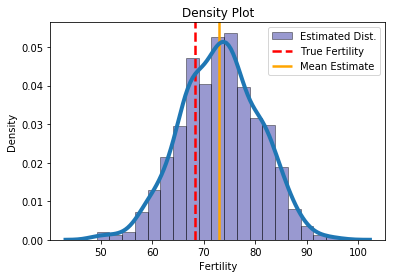

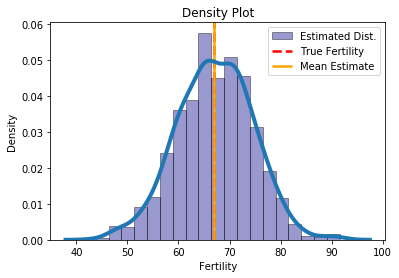

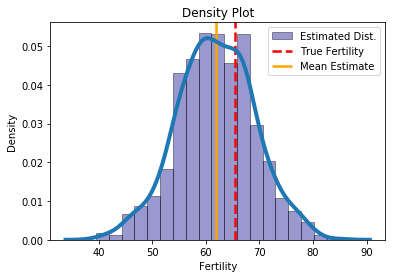

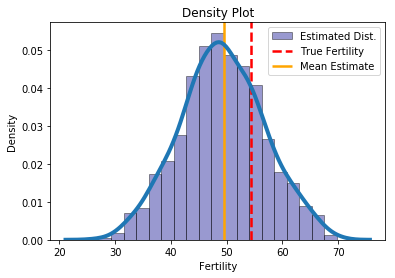

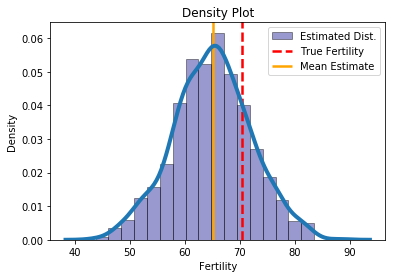

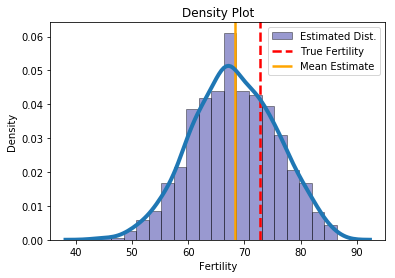

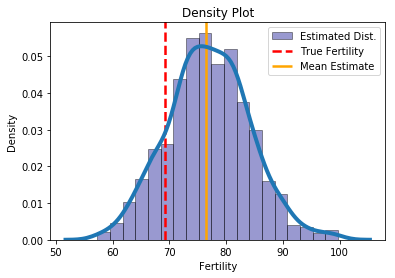

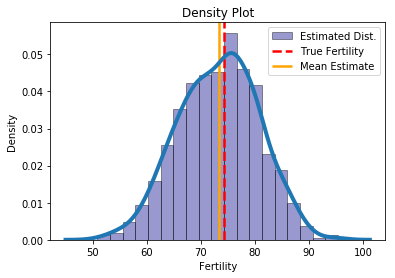

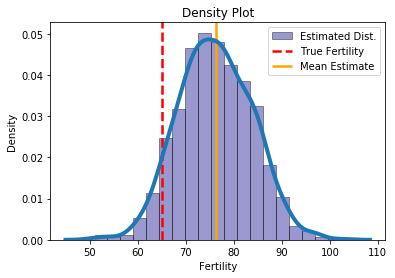

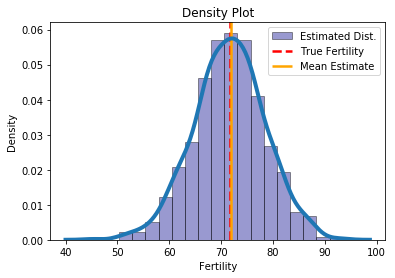

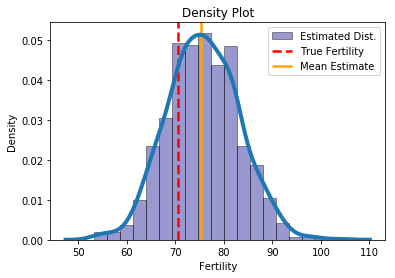

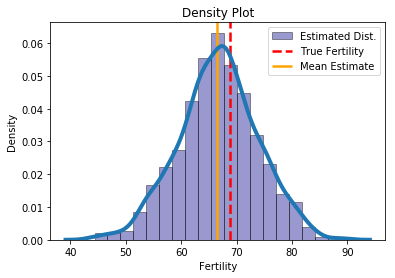

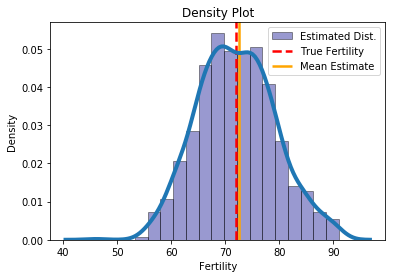

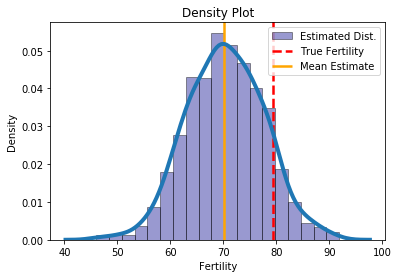

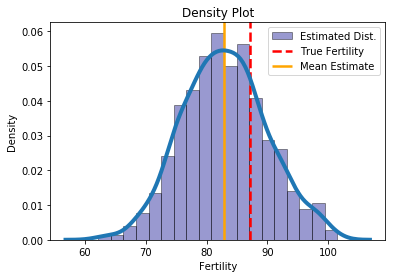

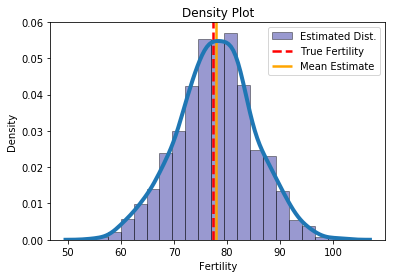

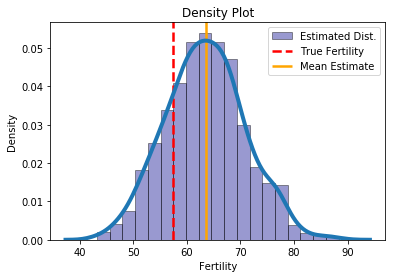

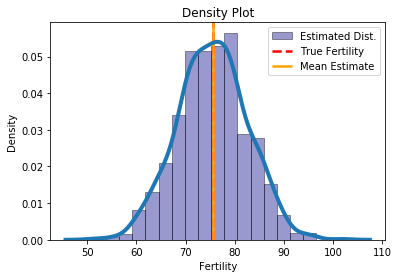

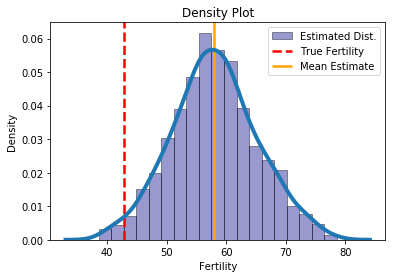

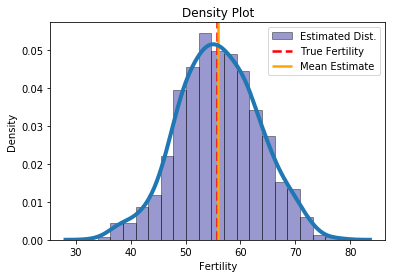

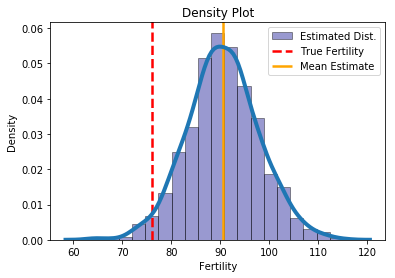

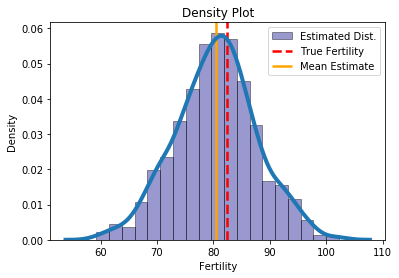

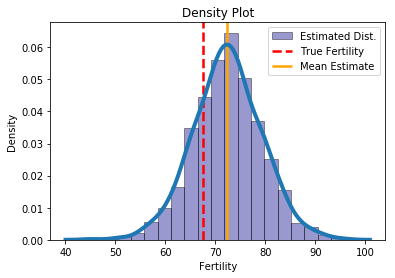

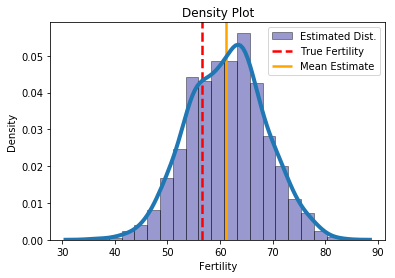

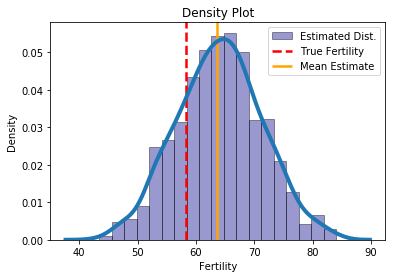

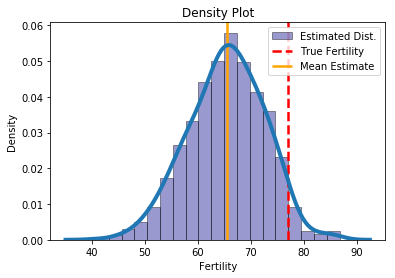

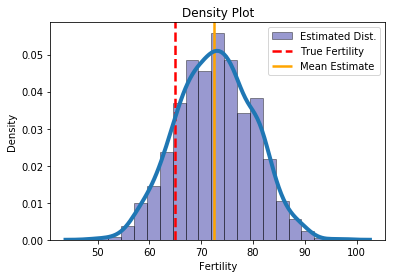

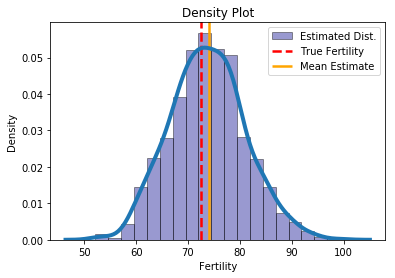

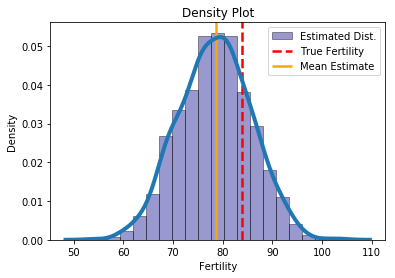

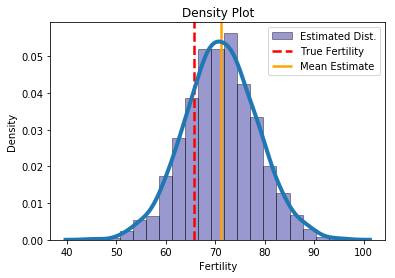

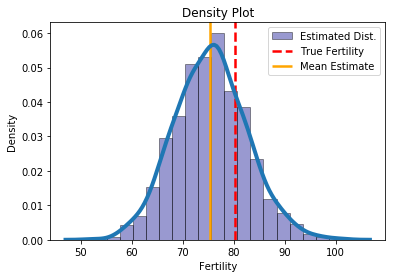

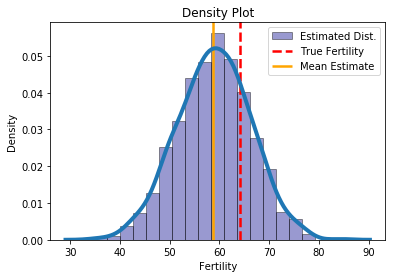

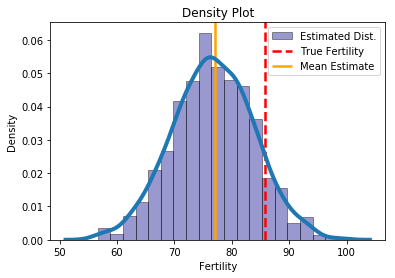

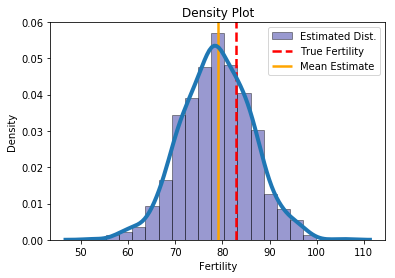

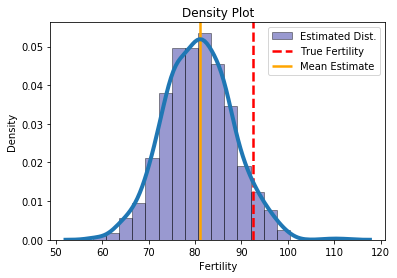

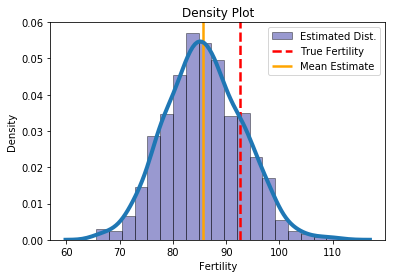

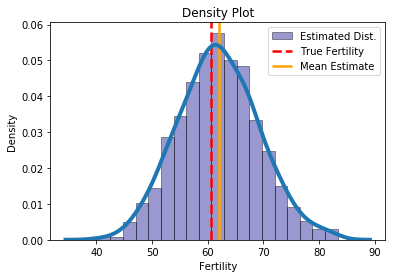

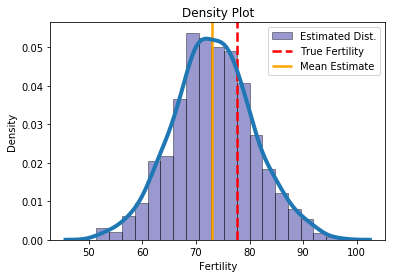

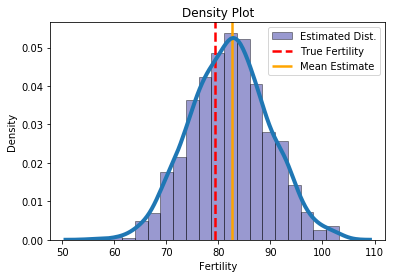

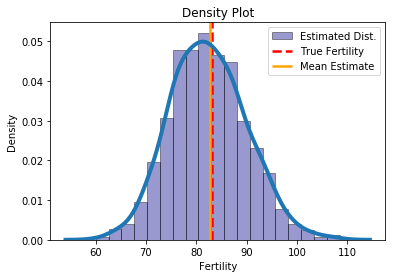

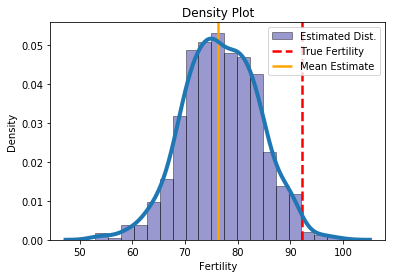

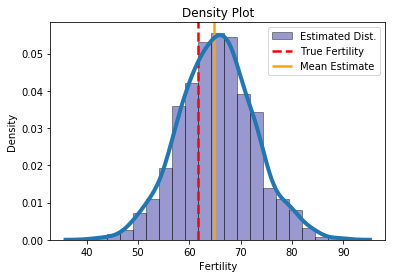

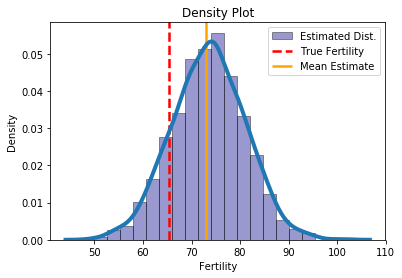

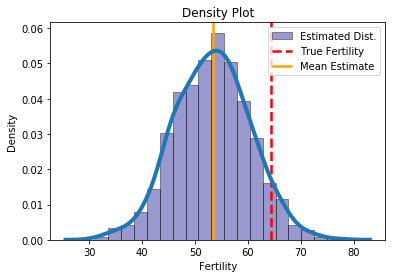

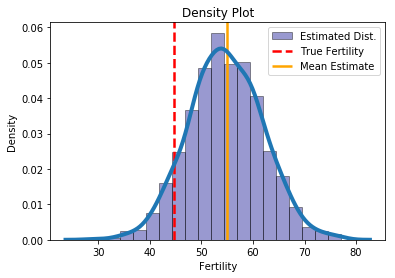

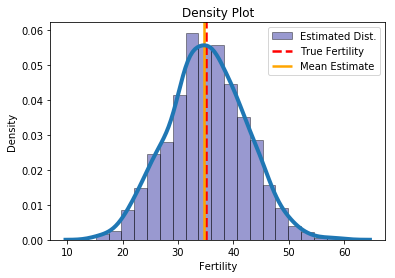

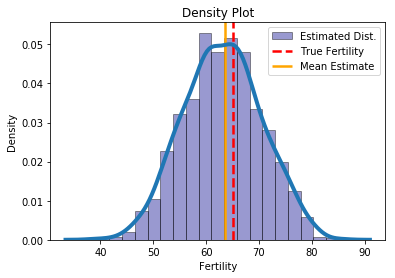

In [25]:
#BLR Model 3 training and test predictions 
b_y3train_pred = [] 
for i in range(len(X3_train_y)):    
    temp = test_model(trace3, X3_train_y.iloc[i])     
    b_y3train_pred.append(temp) 
    
b_y3test_pred = [] 
for i in range(len(X3_test_y)):    
    temp = test_model(trace3, X3_test_y.iloc[i])     
    b_y3test_pred.append(temp)

In [26]:
print('BLR Model 1 - 60:40') 
print(pm.summary(trace)['mean'].round(2)) 
print('Training RMSE: ', rmse(y1_train, b_y1train_pred)) 
print('Testing RMSE: ', rmse(y1_test, b_y1test_pred))

BLR Model 1 - 60:40
Intercept           66.97
Agriculture         -0.09
Examination         -0.12
Education           -0.95
Catholic             0.12
Infant_Mortality     0.76
sd                   8.37
Name: mean, dtype: float64
Training RMSE:  7.146851045061766
Testing RMSE:  6.801389414732747


In [27]:
print('BLR Model 2 - 70:30') 
print(pm.summary(trace2)['mean'].round(2)) 
print('Training RMSE: ', rmse(y2_train, b_y2train_pred)) 
print('Testing RMSE: ', rmse(y2_test, b_y2test_pred))

BLR Model 2 - 70:30
Intercept           66.75
Agriculture         -0.13
Examination         -0.21
Education           -0.81
Catholic             0.10
Infant_Mortality     0.94
sd                   7.75
Name: mean, dtype: float64
Training RMSE:  6.78444454537298
Testing RMSE:  6.7888497675668535


In [28]:
print('BLR Model 3 - 80:20') 
print(pm.summary(trace3)['mean'].round(2)) 
print('Training RMSE: ', rmse(y3_train, b_y3train_pred)) 
print('Testing RMSE: ', rmse(y3_test, b_y3test_pred))

BLR Model 3 - 80:20
Intercept           66.89
Agriculture         -0.17
Examination         -0.36
Education           -0.82
Catholic             0.09
Infant_Mortality     1.16
sd                   7.26
Name: mean, dtype: float64
Training RMSE:  6.445950159742635
Testing RMSE:  7.643650526213025


In [29]:
'''The mean coefficients for all three models are similar to the coefficients of the linear models with similar training and test errors. For Model 3 of the Bayesian Linear method we can interpret that Agriculture, Examination and Education have a negative weight with Education having the largest impact. Catholic and Infant Mortality have a positive weight with Infanty Mortality having a more positive impact''' 

'The mean coefficients for all three models are similar to the coefficients of the linear models with similar training and test errors. For Model 3 of the Bayesian Linear method we can interpret that Agriculture, Examination and Education have a negative weight with Education having the largest impact. Catholic and Infant Mortality have a positive weight with Infanty Mortality having a more positive impact'